In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [4]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS" #NSE stocks usually end with .NS
# Download stock data
stk_data = yf.download(stock_symbol, start="2023-01-01", end="2023-07-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
stk_data

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2023-01-02,1180.586060,1182.006865,1167.890577,1168.715541,5316175
2023-01-03,1171.946655,1179.256896,1167.707271,1175.613232,7658932
2023-01-04,1154.301392,1173.780010,1152.216007,1171.923749,9264891
2023-01-05,1152.239014,1162.482516,1147.632911,1156.570169,13637099
2023-01-06,1162.711548,1167.776018,1154.186834,1158.013796,6349597
...,...,...,...,...,...
2023-06-23,1152.559814,1161.107441,1151.299395,1159.044969,6628570
2023-06-26,1143.760010,1152.857653,1140.620538,1149.007778,12641159


In [6]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [7]:
stk_data

Price,Open,High,Low,Close
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,
2023-01-02,1168.715541,1182.006865,1167.890577,1180.586060
2023-01-03,1175.613232,1179.256896,1167.707271,1171.946655
2023-01-04,1171.923749,1173.780010,1152.216007,1154.301392
2023-01-05,1156.570169,1162.482516,1147.632911,1152.239014
2023-01-06,1158.013796,1167.776018,1154.186834,1162.711548
...,...,...,...,...
2023-06-23,1159.044969,1161.107441,1151.299395,1152.559814
2023-06-26,1149.007778,1152.857653,1140.620538,1143.760010


In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [9]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.5853866870141355
maPe-Testset: 0.9918032786885246
RMSE-Testset: 0.32960539909079195
maPe-Testset: 3370748574126.9893
RMSE-Testset: 0.10979181954792203
maPe-Testset: 2011374020221.1392
RMSE-Testset: 0.10987467364392585
maPe-Testset: 2019934991441.1343


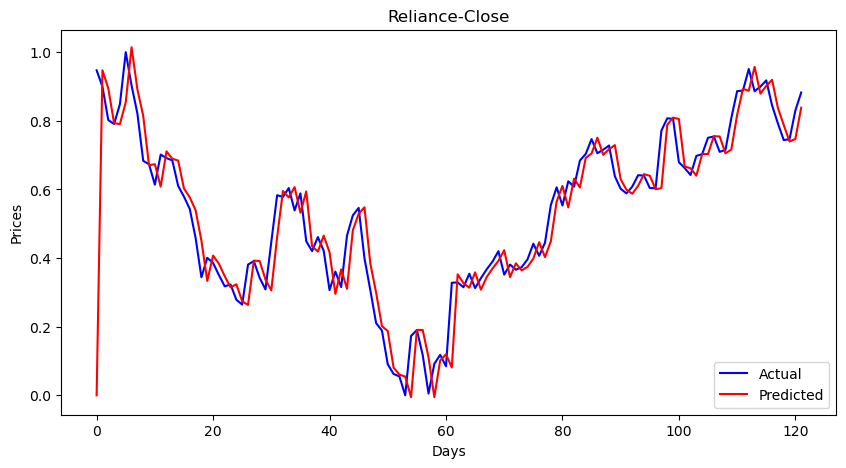

In [11]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [12]:
len(data1)

122

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [14]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

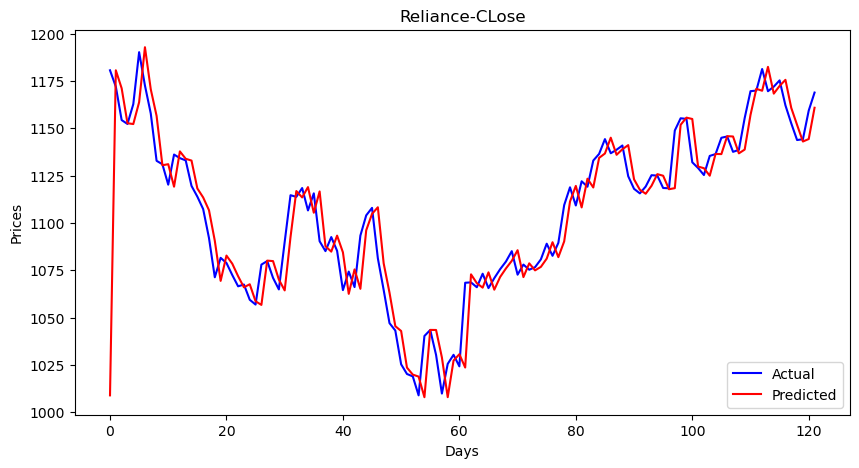

In [16]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [17]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 19.918989396568428
maPe-Testset: 0.00971989210077936


In [18]:
forecast=model_fit.predict(len(data1), len(data1)+1)

In [19]:
forecast

array([0.88671485, 0.88672274])

In [20]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [21]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [22]:
forecast_stock_price_test_oriF

,Closefore
0,1169.627526
1,1169.628956


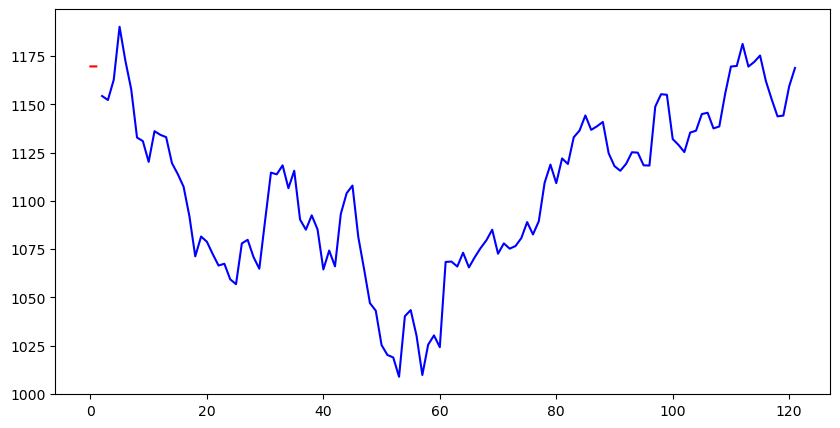

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[2:2225], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")
